# Bollinger bands

In [ ]:
# import necessary libraries 
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [2]:
# import the closing price data of the ITC Limited stock for the period of 2 years -
# from 28th Jan 2019 to 28th Jan 2021

start = datetime.datetime(2019, 1, 28)
end = datetime.datetime(2021, 1, 28)

itc_df = web.DataReader(['ITC.NS'], 'yahoo', start = start, end = end)['Close']
itc_df.columns = {'Close Price'}
itc_df.head()

,Close Price
Date,
2019-01-28,274.750000
2019-01-29,278.450012
2019-01-30,275.500000
2019-01-31,278.649994
2019-02-01,280.850006


In [3]:
# check for null values 

itc_df.isnull().sum()

Close Price    0
dtype: int64

In [4]:
# shape of the dataframe

itc_df.shape

(492, 1)

So we have got 492 rows of data (note that stock markets do not trade on weekends and public holidays)

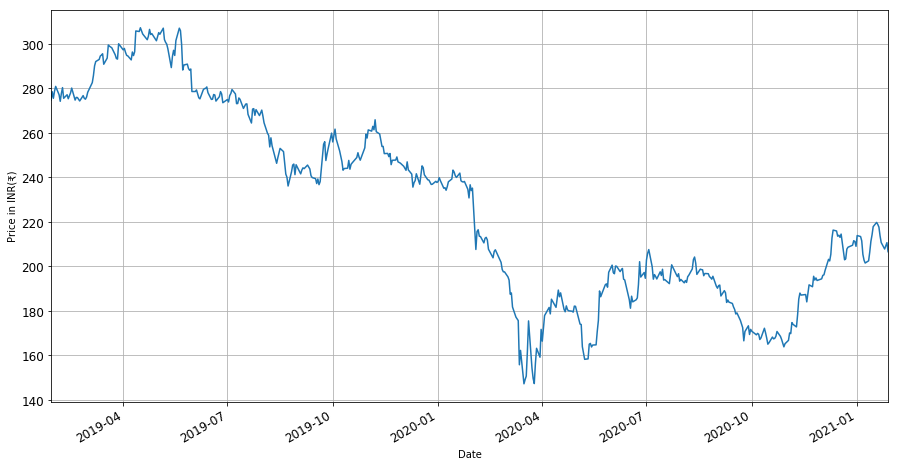

In [5]:
# observe general price variation of the closing price for the given period

itc_df['Close Price'].plot(figsize = (15, 8), fontsize = 12)
plt.ylabel('Price in INR(₹)')
plt.grid()
plt.show()

As it can be seen, there is a steep dip in the price of the stock around the month of April. That is due to the meltdown in the global financial markets at the peak of Covid-19 Crises. 

     
> Using Bollinger Bands Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average. The bollinger bands comprise the following data points: The 14 day rolling mean of the closing price (mvoing average), Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Bollinger bands are extremely reliable, with a 95% confidance at 2 standard deviations and especially useful in sideways moving market.

In [6]:
# compute the datapoints for moving average, upper band and the lower band

def bollinger_band(price, length = 20, num_stdev = 2):
    mean_price = price.rolling(length).mean()
    stdev = price.rolling(length).std()
    upband = mean_price + num_stdev*stdev
    dwnband = mean_price - num_stdev*stdev
    
    return np.round(mean_price, 3), np.round(upband, 3), np.round(dwnband, 3)

itc_df['Moving_avg'], itc_df['Upper_band'], itc_df['Lower_band'] = bollinger_band(itc_df['Close Price'])

In [7]:
itc_df.tail()

,Close Price,Moving_avg,Upper_band,Lower_band
Date,,,,
2021-01-21,213.699997,211.017,221.825,200.210
2021-01-22,210.699997,211.122,221.872,200.373
2021-01-25,207.800003,211.037,221.867,200.208
2021-01-27,210.649994,210.992,221.821,200.164
2021-01-28,206.600006,210.765,221.769,199.761


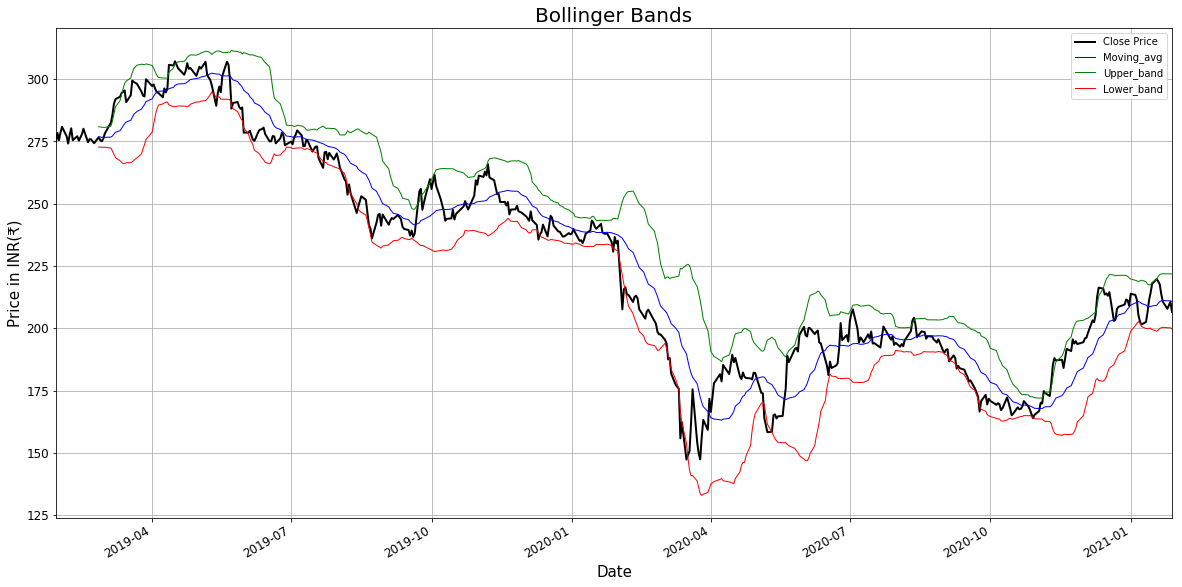

In [10]:
# plotting and visualization of bollinger bands

itc_df['Close Price'].plot(c = 'k', figsize = (20,10), lw = 2, fontsize = 12)
itc_df['Moving_avg'].plot(c = 'b', figsize = (20, 10), lw = 1)
itc_df['Upper_band'].plot(c = 'g', figsize = (20, 10), lw = 1) 
itc_df['Lower_band'].plot(c = 'r', figsize = (20, 10), lw = 1)

# show plot
plt.title('Bollinger Bands', fontsize = 20)
plt.ylabel('Price in INR(₹)',fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend()
plt.grid()
plt.show()

> Let's say I wish to the plot bollinger bands for SBI stock. So do we have to repeate all the above steps? Why not create a function instead that takes the stock symbol and the time period and plots the bollinger bands for us. 

In [51]:
def plot_bollinger_bands(stock_symbol, start_date, end_date, MA_period = 20, num_stdev = 2):
    '''
    stock_symbol:  (str)stock ticker as on Yahoo finance. Eg: 'ULTRACEMCO.NS' 
    start_date:    (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    end_date:      (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    MA_period:     (int)moving average window period (Usually we take 20).
    num_stdev:     (int)number of standard deviations (Most commonly 2 std devs are considerd). 
    
    '''
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    stock_df = web.DataReader(stock_symbol, 'yahoo', start = start, end = end)['Close']
    stock_df = pd.DataFrame(stock_df)
    stock_df.columns = {'Close Price'} 
    stock_df.dropna(axis = 0, inplace = True) 
    
    # compute the datapoints for moving average, upper band and the lower band
    def bollinger_band(price, MA_period, num_stdev):
        mean_price = price.rolling(MA_period).mean()
        stdev = price.rolling(MA_period).std()
        upband = mean_price + num_stdev*stdev
        dwnband = mean_price - num_stdev*stdev
        return np.round(mean_price, 3), np.round(upband, 3), np.round(dwnband, 3)

    stock_df['Moving_avg'], stock_df['Upper_band'], stock_df['Lower_band'] = bollinger_band(stock_df['Close Price'], 
                                                                                            MA_period, num_stdev)
    
    # plotting and visualization of bollinger bands
    stock_df['Close Price'].plot(c = 'k', figsize = (20,10), lw = 2, fontsize = 12)
    stock_df['Moving_avg'].plot(c = 'b', figsize = (20, 10), lw = 1)
    stock_df['Upper_band'].plot(c = 'g', figsize = (20, 10), lw = 1) 
    stock_df['Lower_band'].plot(c = 'r', figsize = (20, 10), lw = 1)

    # show plot
    plt.title('Bollinger Bands: {}'.format(stock_symbol), fontsize = 20)
    plt.ylabel('Price in INR(₹)',fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.legend()
    plt.grid()
    plt.show()

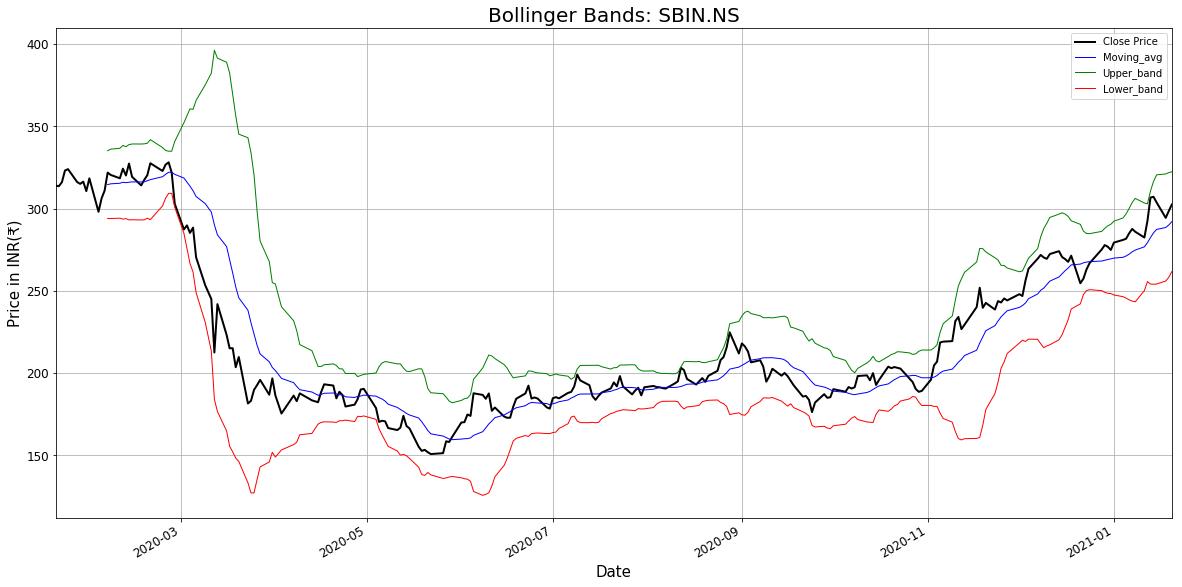

In [54]:
plot_bollinger_bands('SBIN.NS', '2020-01-20', '2021-01-20', 14, 3)

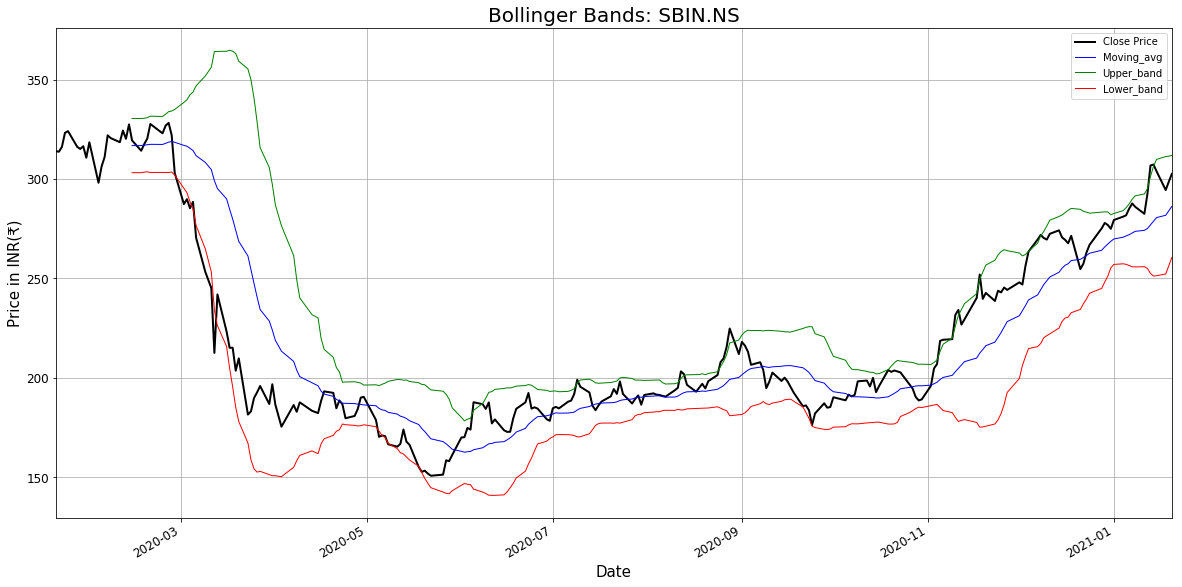

In [46]:
plot_bollinger_bands('SBIN.NS', '2020-01-20', '2021-01-20')